Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 01: Image Enhancement & Color

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available at the beginning of the week and are supposed to be solved in groups. They have to be handed in before the next practice session (Monday evening). The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP if you have not already done so (See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before end of **Monday, November 17, 2024**. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Computing Contrast and Entropy (5 points)


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

C:\Users\braun\AppData\Local\Temp\ipykernel_17264\2196853300.py:31: RuntimeWarning: overflow encountered in scalar multiply
  contrast = 1 / (value_range[1] * (img.max() - img.min()))


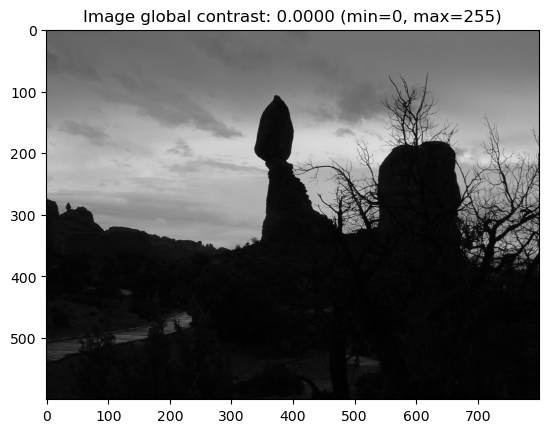

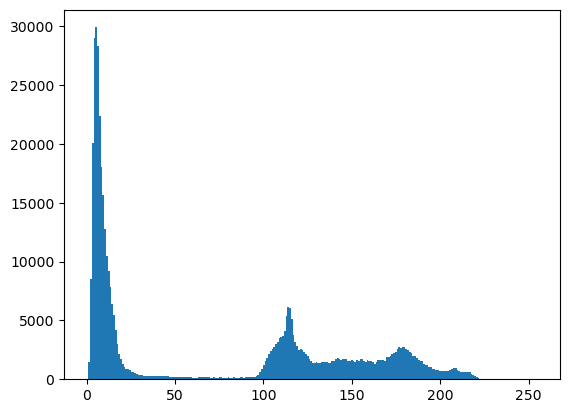

In [3]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The global contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    # YOUR CODE HERE

    # If the image is uniform (all pixels have the same intensity), return zero contrast
    if img.max() == img.min():
        return 0  # No contrast if all pixel values are identical
    
    # Calculate the global contrast using the formula:
    # cglobal = 1 / (R * (max(g(x, y)) - min(g(x, y))))
    # R is the maximum value in the image's range (usually 255 for 8-bit) therefore we use value_range[1]
    contrast = 1 / (value_range[1] * (img.max() - img.min()))

    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

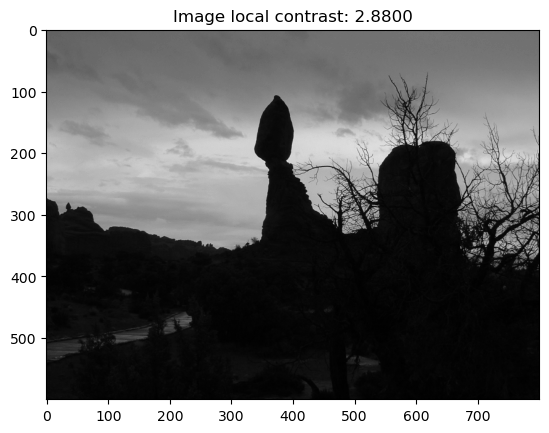

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio.v2 import imread

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """

    # YOUR CODE HERE
    # Get the dimensions of the image
    M, N = img.shape
    total_contrast = 0
    num_pixels = 0

    # Iterate over each pixel, skipping the borders to avoid out-of-bounds errors
    for x in range(1, M - 1):
        for y in range(1, N - 1):
            g_xy = img[x, y]
            
            # Get 4-connected neighbors (top, bottom, left, right)
            neighbors = [img[x - 1, y], img[x + 1, y], img[x, y - 1], img[x, y + 1]]
            neighbor_avg = np.mean(neighbors)
            
            # Compute the absolute difference
            total_contrast += abs(g_xy - neighbor_avg)
            num_pixels += 1

     # Normalize by the total number of pixels considered
    contrast = total_contrast / num_pixels if num_pixels > 0 else 0 

    return contrast


img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

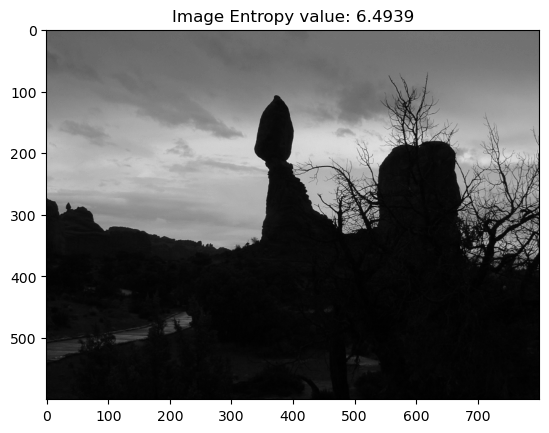

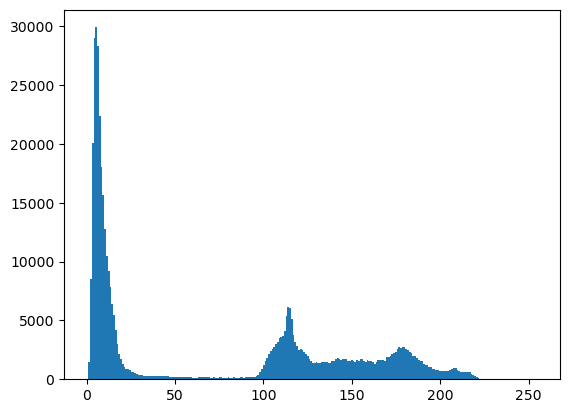

In [6]:
%matplotlib inline
import numpy as np
import math
from imageio.v2 import imread
import scipy.stats

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        img_entropy (float): The entropy of the image. 
    """
    # Flatten the image to get pixel intensity values
    img_flat = img.flatten()
    
    # Calculate the histogram of pixel intensities and use full range 0-255
    histogram, _ = np.histogram(img_flat, bins=256, range=(0, 255))
    
    # Normalize the histogram to get the probability distribution
    total_pixels = img_flat.size
    probabilities = histogram / total_pixels

    # Remove zero values to avoid log2(0)
    probabilities = probabilities[probabilities > 0]
    
    # Calculate entropy using the formula
    img_entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return img_entropy

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

assert math.isclose(entropy(img), scipy.stats.entropy(np.unique(img.flat, return_counts=True)[1], base=2))

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

C:\Users\braun\AppData\Local\Temp\ipykernel_17264\2196853300.py:31: RuntimeWarning: overflow encountered in scalar multiply
  contrast = 1 / (value_range[1] * (img.max() - img.min()))


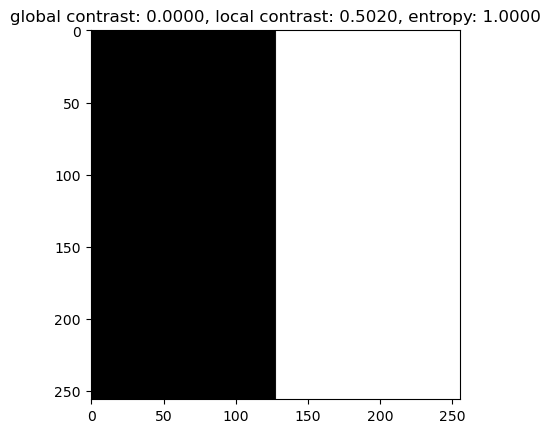

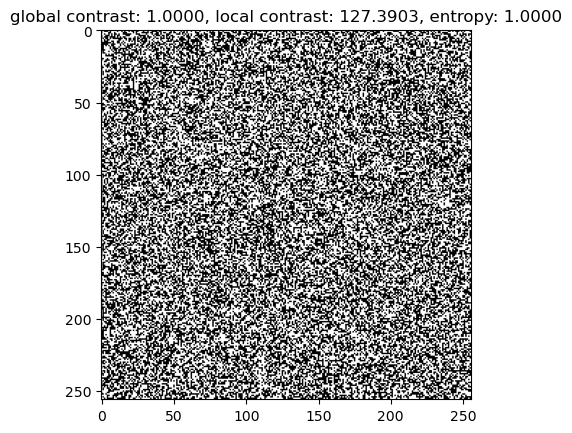

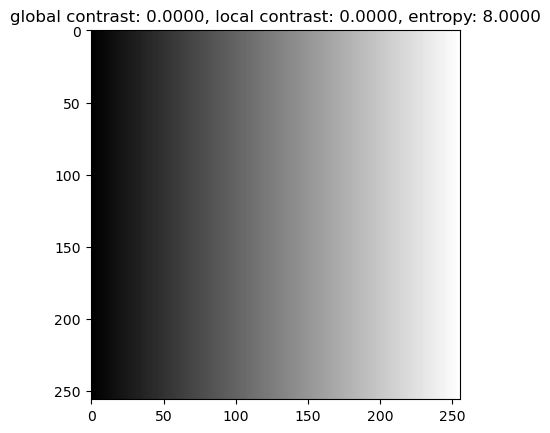

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    """ Displays an image, local and global contrast, and the entropy
    
    Args:
        img (ndarray): Image which is displayed and statics are computed for.
        
    """
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()

# Create an artificial image with high global contrast but low local contrast
img1 = np.zeros((256, 256), np.uint8)
# Difference between 0 (black) and 255 (white) creates high global contrast
img1[:, :128] = 0    # Left half black
# The local contrast is low because each half is uniform and there are no changes withting small neighborhoods
img1[:, 128:] = 255  # Right half white

image_info(img1)


# Create an artificial image with high local contrast but low global contrast
img2 = np.zeros((256, 256),np.uint8)
block_size = 8

# Create high local contrast within small blocks (alternating between 0 and 255)
for i in range(0, 256, block_size):
    for j in range(0, 256, block_size):
        # Fill each block with alternating black and white pixels
        img2[i:i+block_size, j:j+block_size] = np.random.choice([0, 50], size=(block_size, block_size))

image_info(img2)


# Create an artificial image with maximal entropy but low global contrast
img3 = np.zeros((256, 256),np.uint8)

# Add some random noise (values between 0 and 10)
img3 = np.clip(img3 + np.random.randint(0, 10, (256, 256), np.uint8), 0, 255)

# Create a gradient (smooth transition from black to white)
gradient = np.linspace(0, 255, 256).astype(np.uint8)  # Horizontal gradient
img3 = np.tile(gradient, (256, 1))  # Repeat it across the entire image

# Clip pixel values to stay within valid range (0 to 255)
img3 = np.clip(img3, 0, 255)

image_info(img3)

## Assignment 2: Contrast enhancement (5 points)

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Contrast is:
- in a nutshell: contrast is the difference between saturations

Ways to measure contrast:
Globally:
Cglobal(g) = 1/R (maxg(x,y) - ming(x,y))

Locally:
Clocal(g) = 1/NxM sum(overall pixels) abs(intesity(current pixel) - mean intensity of neighbourhood)

Low contrast can be caused by: 
- light 

It is a problem when:
- perceptibility for humans is limited
- details vanish (information)
- multiple layers in the image (back-, middle-, foreground)

It is not when: 
- details dont matter
- background 
- uniform coloured images 


Ways to improve contrast:
Globally:
- Maximizing the global contrast by applying a (linear) transfer function 
Locally:
- improving local contrast by applying a nonlinear monotonic transfer function (has to be nonlinear bc otherwise we would just rescale it without changing the actual contrast), like the gamma correction ()
- histogram equalisation (see below) 

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

The way it works:
idea: 
- the optimal image has the maximum information content
- maximise the entropy E of the histogram
- E is maximised if P(g) = const for all g = 0...255 (always same value, uniform distribution, like mixed Latte Macchiato)


Entropy:
- average information content
- maximal unequally: low
- maximal equally: high
- can be calculated by taking the probabilties of the grey values


Entropy's relation to histogram equalization:
- we try to find a transfer function for the histogram of an image that maximises the entropy 
- this maximised entropy is shown as a uniform distributed histogram

-> All focussed on the conceptually simpler continuous case

### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-02 slides 29-32).

Occuring problems when considering discrete images: 
- histogram values are transformed to real values (reelle Zahlen(mit Dezimalzahlen))
- digitale Bilder sind grundsätzlich diskret 
- not all continiously available gray values can be mapped onto discrete images and therefore have to be rounded up
- by rounding up it could be that we end up outside the range, therefore we substract 1 from the result

main problem is the rounding up though, because:
- goal would be to have a uniform distribution but since we are in a discrete range and have to round up, we cannot reach this 
- eg the grey values 4,5,6,7 are now all of value 7



## Assignment 3: Adaptive Histogram Equalization (5 points)

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994](Zuiderveld-1994.pdf). You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

The idea rootes on the concept of entropy. According to entropy, an image's information is theoretically maximal when each pixel's value is equally likely to be found in the image. The AHE algorithm bases on the idea to map the image's pixel values $g$ with a transfer function $f$ to an output image $g'=f(g)$. Conversely to the histogram equalization (HE), this process is not globally applied(global operator) but the image is subdivided into smaller subimages (local operator). For each of the subimages the histogram equalization is applied. Therefore, we think of the AHE as locally applied histogram equalization.
Due to this process of applying histogram equalization to subimages, oddly artifacts can be introduced.
Furthermore, for a continuous function, the transfer function $f$ that maximizes information can be found. But for discrete functions, the transfer function $f$ can decrease the information.  


### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

The CLAHE is an optimization of the AHE. It was introduced to prevent the overly enhancement of pixels values that are very close to each other. It tries to optimize the transfer function $f$ by enhancing contrast up to a predefined maximum.  

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

According to a naive implementation, the runtime, big O notation $O(n)$, yields a high number since the AHE is applied to each pixel. 
Due to the relative similarity of adjacent pixels AHE might be less frequently applied. Pixels that are in between affected AHE applied pixels might be linear interpolated to save up the usage of computationally expensive AHE.   

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-02, slide 24).

C:\Users\moorb\AppData\Local\Temp\ipykernel_25508\2195811841.py:13: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


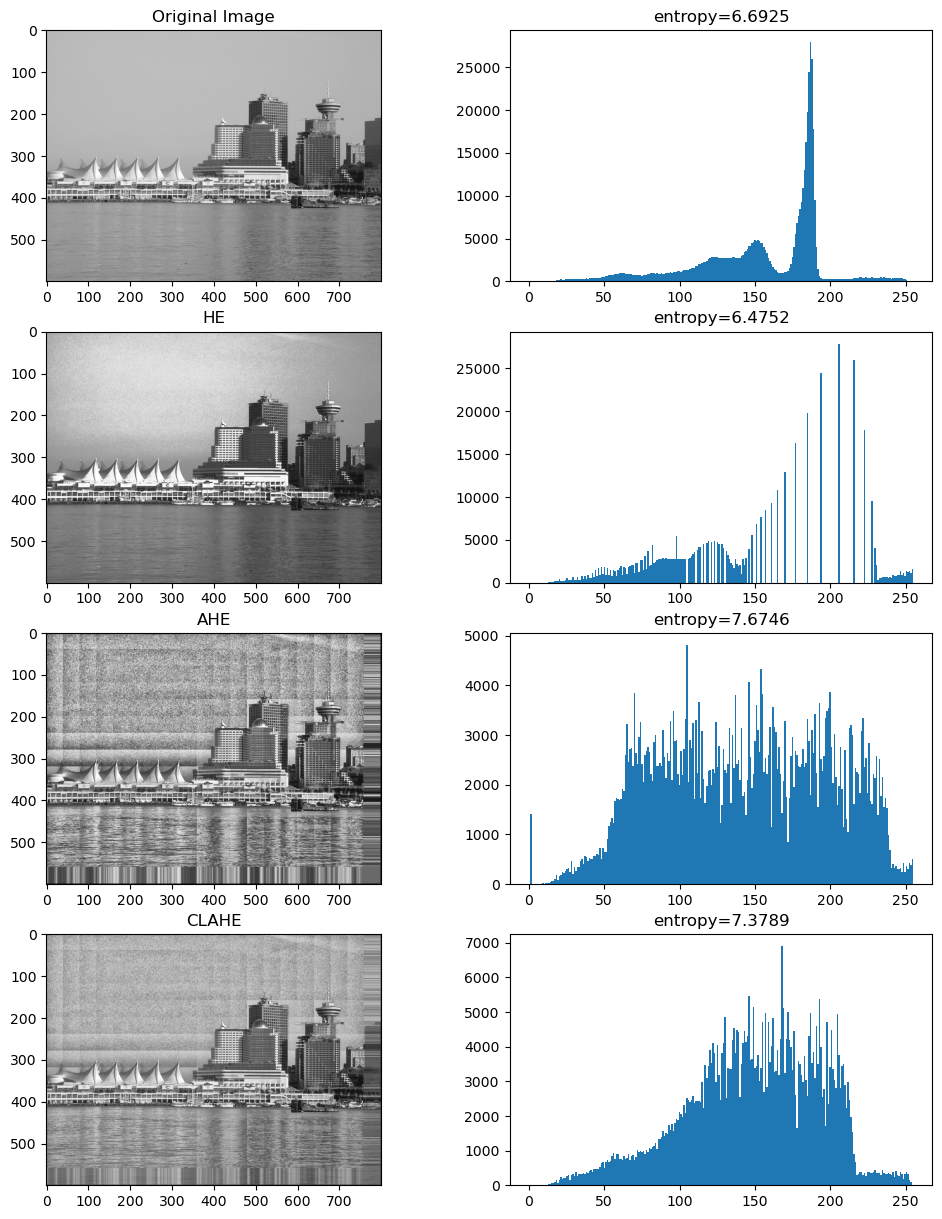

In [2]:
%matplotlib inline
# YOUR CODE HERE
from imageio.v2 import imread
import matplotlib.pyplot as plt
import numpy as np

img = imread('images/canada.png', pilmode='L')
frame = img

def get_information_content(frame):
    hist = np.array([np.where(frame==i ,1 ,0).sum() for i in range(256)])
    prob = hist/hist.sum()
    info = np.where(prob>1e-6, np.log2(prob), 0)
    return info


def entropy(frame):
    info = get_information_content(frame)
    hist = np.array([np.where(frame==i ,1 ,0).sum() for i in range(256)])
    prob = hist/hist.sum()
    entropy = -(prob * info)[~np.isnan(prob)].sum()
    return entropy



def histogram_equalization(frame):
    hist = np.array([np.where(frame==i ,1 ,0).sum() for i in range(256)])
    prob = hist/hist.sum()
    transfer = np.cumsum(prob) -np.arange(256)/256 
    transfer = {i:val for i, val in enumerate(transfer)}
    return transfer


def adaptive_histogram_equalization(frame, n=20, k=20):
    # k = int(frame.shape[1]/2)-1
    frame_ahe = np.ones_like(frame)
    for i in range(n, frame.shape[0]-n, n*2):
        for j in range(k, frame.shape[1]-k, k*2):
            curr_frame = frame[i-n:i+n, j-k:j+k]
            transfer = histogram_equalization(curr_frame)
            
            for x in range(curr_frame.shape[0]):
                for y in range(curr_frame.shape[1]):
                    frame_ahe[i-n+x:i+n+x,j-k+y:j+k+y] = curr_frame[x,y] * (1 + transfer[curr_frame[x,y]])   
    return frame_ahe


def contrast_limited_histogram_equalization(frame):
    frame_clahe = frame.copy()
    frame_clahe = 0.5 * frame_clahe + 0.5 * adaptive_histogram_equalization(frame)
    return frame_clahe





transfer = histogram_equalization(frame)

frame_he = np.ones_like(frame)
for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        frame_he[i,j] = frame[i,j] * (1 + transfer[frame[i,j]])


frame_ahe = adaptive_histogram_equalization(frame)
frame_clahe = contrast_limited_histogram_equalization(frame)


img_he = frame_he 
img_ahe = frame_ahe 
img_clahe = frame_clahe 

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he, cmap="gray")
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 255))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe, cmap="gray")
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 255))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe, cmap="gray")
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 255))

plt.show()

## Assignment 4: Colormaps (5 points)

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

* sequential: By usually keeping a single hue, the lightness and mostly saturation is changed and is used to represent information that has ordering
* diverging: Changing lightness and possibly saturation of two colors that meet in the middle at an unsaturated color and is used when there is a critival middle value or the data devaites around zero
* qualitative: Is used to represent information that does ot have relationship or ordering and is for miscellanous colors

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-02, slide 43):

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

colors = []

# The following is just for demonstration: replace and extend by your own examples
colors.append((np.asarray((lambda x: np.sin(x/256*2*np.pi)*128+128, 
                           lambda x: (x//16) * 16,
                           lambda x: (2*x) % 256)),
              "Demo"))
# YOUR CODE HERE
raise NotImplementedError()

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i, (color, label) in enumerate(colors):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[0](gray), 'red')
    plt.plot(gray, color[1](gray), 'green')
    plt.plot(gray, color[2](gray), 'blue')
    plt.imshow(np.stack([color[0](a),color[1](a),color[2](a)],axis=2)/256, origin='lower')
    plt.title(label)
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

colors = []

# YOUR CODE HERE
colors.append((np.asarray
                          ((lambda x: np.clip(3*x, 0, 180), 
                           lambda x: np.clip(0.5*x, 60, 240),
                           lambda x: np.clip(20*x, 20, 100))),
              "Sequential"))

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i, (color, label) in enumerate(colors):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[0](gray), 'red')
    plt.plot(gray, color[1](gray), 'green')
    plt.plot(gray, color[2](gray), 'blue')
    plt.imshow(np.stack([color[0](a),color[1](a),color[2](a)],axis=2)/256, origin='lower')
    plt.title(label)
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

colors = []

# YOUR CODE HERE
colors.append((np.asarray((
                    lambda x: (5*x) % 256,  
                    lambda x: (2*x) % 256,  
                    lambda x: (6*x) % 256)),
                    "Qualitative"))

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i, (color, label) in enumerate(colors):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[0](gray), 'red')
    plt.plot(gray, color[1](gray), 'green')
    plt.plot(gray, color[2](gray), 'blue')
    plt.imshow(np.stack([color[0](a),color[1](a),color[2](a)],axis=2)/256, origin='lower')
    plt.title(label)
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

colors = []

# YOUR CODE HERE
colors.append((np.asarray((
        lambda x: np.sin(x/256*2*np.pi)*128+128,   # Blue to White
        lambda x: 255 - np.abs(x-170),          # White to Red
        lambda x: np.sin(x/256*2*np.pi)*128+128 # Blue to White
    )), 
"Diverging"))

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i, (color, label) in enumerate(colors):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[0](gray), 'red')
    plt.plot(gray, color[1](gray), 'green')
    plt.plot(gray, color[2](gray), 'blue')
    plt.imshow(np.stack([color[0](a),color[1](a),color[2](a)],axis=2)/256, origin='lower')
    plt.title(label)
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  
\begin{pmatrix} \lambda ^ \gamma \\ \lambda ^ \gamma \\ \lambda ^ \gamma \end{pmatrix} + a \begin{pmatrix}-0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \phi \\ \sin \phi\end{pmatrix}$$
with $\phi = 2 \pi (\frac{\text{start\_color }}{3} + \text{rotations}\cdot \lambda)$ and $ a = \frac{\text{hue}\cdot \lambda ^ \gamma \cdot( 1 - \lambda ^ \gamma)}{2}$ (with 'start\_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

In [ ]:
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt

start_color = 0.5
rotations = -1.5
hue = 1
gamma = 1
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])
%matplotlib inline
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt

start_color = 0.5
rotations = -1.5
hue = 1
gamma = 1
m = np.matrix([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        # YOUR CODE HERE
        lam = i**gamma
        a = (hue * lam * (1-lam))/2
        phi = 2*np.pi*(start_color/3 + rotations * lam)

        dot = np.dot(m, np.array([np.cos(phi),  np.sin(phi)]))
        RGB = lam + a * dot
        lookup_table[i] = np.clip(RGB, 0, 1)

    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

int_table = (lookup_table*256).astype(int)
plt.figure(figsize=(8,8))
plt.plot(gray, int_table[gray,0], 'red')
plt.plot(gray, int_table[gray,1], 'green')
plt.plot(gray, int_table[gray,2], 'blue')
plt.imshow(np.stack([int_table[a,0],int_table[a,1],int_table[a,2]],axis=2)/256, origin='lower')
plt.title("Cube Helix")
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()
def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    
    for i in np.arange(256):
        # YOUR CODE HERE
        raise NotImplementedError()
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

int_table = (lookup_table*256).astype(int)
plt.figure(figsize=(8,8))
plt.plot(gray, int_table[gray,0], 'red')
plt.plot(gray, int_table[gray,1], 'green')
plt.plot(gray, int_table[gray,2], 'blue')
plt.imshow(np.stack([int_table[a,0],int_table[a,1],int_table[a,2]],axis=2)/256, origin='lower')
plt.title("Cube Helix")
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

FileNotFoundError: No such file: 'c:\Users\moorb\Documents\MyProjects\Code\Repositories\ComputerVision\Homeworks\1\images\lung.png'

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    
    """
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
# printing the jet colormap and how it would look like if printed black and white
show_colormap('jet')

# doing the same for cube helix
show_colormap('cubehelix')

YOUR ANSWER HERE